# Preprocessing sample data 

In [19]:
!pip install kneed  

  Running setup.py bdist_wheel for kneed: started
  Running setup.py bdist_wheel for kneed: finished with status 'done'
  Stored in directory: C:\Users\Plaban_Nayak\AppData\Local\pip\Cache\wheels\de\36\b1\6f1499979c9d0e1d1732081b7f50847156405c5ab7d493fbef
Successfully built kneed


Cache entry deserialization failed, entry ignored
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [69]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tensorflow as tf
from kneed import DataGenerator, KneeLocator #Knee-point detection in Python
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
%matplotlib inline
import datetime
class Alarm_Corelation:
    def __init__(self):
        self.file_name = file_name
    def process_data(file_name):
        df_inp = pd.read_csv('Kmeans.csv')
        print(df_inp.head())
        df_sample = df_inp.copy()
        df_sample = df_sample[['FirstNotifiedAt','SiteID','InstanceID']]
        df_sample['Date'] = pd.to_datetime(df_sample['FirstNotifiedAt'], unit = 's')
        df_sample['Hour'] = df_sample['Date'].dt.hour
        df_sample = df_sample[pd.unique(['Date']+df_sample.columns.values.tolist()).tolist()]
        print(df_sample.head())
        df_data =  df_sample.copy()
        df_data.drop('Hour',axis=1,inplace=True)
        df_data = df_data.set_index('Date')
        print(df_data.count())
        data = df_data.values.tolist()
        x = range(1,df_sample.Hour.nunique()+ 1)
        y = df_sample.Hour.unique()
        print(len(x),len(y))
        #Knee-point detection in Python
        kn = KneeLocator(x, y, direction='decreasing')
        k = kn.knee
        #knee point plot
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.xticks(range(1,21))
        plt.plot(x, y, 'bx-')
        plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
        plt.title("optimal number of clusters (k) to use in k-means clustering")
        #plt.show()
        plt.savefig("optimal_k_Value.png")
        return df_data,data,k
    
    def build_model(k):
        num_clusters = k
        estimator = tf.contrib.learn.KMeansClustering(
        num_clusters,
        model_dir="C:/new0",
        initial_clusters='kmeans_plus_plus',
        distance_metric='squared_euclidean',
        relative_tolerance = 0.001,
        kmeans_plus_plus_num_retries = 10,
        use_mini_batch=True)
        return estimator
    
    
        
    def train_model(kmeans,X):
        def train_input_fn():
            data = tf.constant(X, tf.float32)
            return (data, None)
        
        kmeans.fit(input_fn=train_input_fn,steps=1000)
        
        
    def predict_clusters(kmeans,X):
        def predict_input_fn():
            data = tf.constant(X, tf.float32)
            return (data, None)
        clusters_predict = kmeans.predict_cluster_idx(input_fn=predict_input_fn)
        clusters = list(clusters_predict)
        return clusters
    def Kmeans_data_visualize(df,X,Clusters,k):
        df['Clusters'] = Clusters
        print(df.head())
        data2 = df.values
       
        num_clusters = k
        kmeans = KMeans( num_clusters )
        kmeans.fit(X)
        cluster_num = k
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        colors = ["g.","r.","c.","y."]
        color = np.random.rand(cluster_num)
        c = Counter(labels)
        fig = figure()
        ax = fig.gca(projection='3d')
        fignum = 1
        for i in range(len(X)):
            ax.scatter(X[i][0], X[i][1],X[i][2],c=None)
        ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100)
        plt.title('Kmeans Clustering')
        plt.show()
        plt.savefig('Kmeansclustering.png')
        
    def export_cluster_data(df,Clusters):
        df['Clusters'] = Clusters
        print(df.head())
        df.to_csv("Clusters_Predicted.csv",index=False)
        df_cluster = df.copy()
        return df_cluster
    
    def process_jaccard(df_cluster):
        #Organizing DeviceIDs based on the clusters generated by K means Algorithm
        sample = df_cluster.copy()
        sample = sample[['FirstNotifiedAt','InstanceID','Clusters']]
        print(sample.head())
        num_cluster = sample['Clusters'].unique()
        print(len(num_cluster))
        dfnew = df_cluster.groupby(['FirstNotifiedAt','Clusters']).size().reset_index(name='Freq')
        df_eval = dfnew[dfnew.Freq > 1]
        #creating list variables dynamically 
        df_e = df_eval.values
        for items in df_e:
            vars()["list"+str(items[1])] = []
        
        common_device= {}
        test = sample.values
        for items in df_e:
            list1 = []
            for i in test:
                if (i[0] == items[0]):  
                     list1.append(i[1])
             
            common_device[str(int(items[0]))+ "|" + str(int(items[1]))]= list1
        #######################################################################   
        dev_list = []
        #print(common_device)
        for K,V in common_device.items():
               dev_list.append(V)
        #######################################################################  
        new_list = []
        for items in dev_list:
            k = dev_list.count(items)
            if [items,k] not in new_list:
                new_list.append([items,k])
        #######################################################################  
        #eliminating duplicates 
        list_no_dup_dev = []
        [list_no_dup_dev.append(item) for item in new_list if item not in list_no_dup_dev]
        print(len(list_no_dup_dev))
        #######################################################################  
        #Adding the element ids into corresponding sets corresponding to each cluster
        grp = sample.values
        grp = grp.tolist()
        #######################################################################
        for i in range(0,len(num_cluster)):
            vars()["set"+str(num_cluster[i])]= set()
            
        for i in range(len(grp)):
             #print(grp[i],i)
             #if grp[i][0] == 1:
            vars()["set"+str(grp[i][2])].add(grp[i][1])
        #print(set0)
        #######################################################################
        dict_cluster={}
        print(len(num_cluster))
        for i in range(0,len(num_cluster)):
            
            #print('The number of elements in  SET'+str(num_cluster[i])+' : ',len(vars()["set"+str(num_cluster[i])]))
            #print('The Contents of SET'+str(num_cluster[i])+' : ',vars()["set"+str(num_cluster[i])])
            #print('\n')
            dict_cluster[i] = vars()["set"+str(num_cluster[i])]
        print(len(dict_cluster))
        
        #######################################################################    
        # adding only those device sets which have a cardinality GE 1
        list_set1 =[]
        for i in range(0,len(num_cluster)):
            if len(vars()["set"+str(num_cluster[i])]) > 1:
                list_set1.append(vars()["set"+str(num_cluster[i])])
            else:
                print(vars()["set"+str(num_cluster[i])])
        #######################################################################         
        #Jaccard index calculation function
        def jaccard_similarity(x,y):
             intersection_dev =  set.intersection(*[set(x), set(y)])
             intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
             intersection_dev =  set.intersection(*[set(x), set(y)])
             union_cardinality = len(set.union(*[set(x), set(y)]))
     
             if union_cardinality > 0:
                similar = intersection_cardinality/float(union_cardinality)
        
             else:
                similar = 0.0     
    
             return (similar,intersection_dev)
        #######################################################################  
        list_linked1 = []
        for q in range(0,len(list_set1)):
            outk = [k for k, v in dict_cluster.items() if v == list_set1[q]]
            for i in range(0,len(list_set1)):
                ink = [k1 for k1, v1 in dict_cluster.items() if v1 == list_set1[i]]
                if i > q :
                    r,common_dev = jaccard_similarity(list_set1[q], list_set1[i])
                    if (r > 0.0) :
                        list_linked1.append(('SET'+str(outk),'SET'+str(ink),common_dev,r))
        #######################################################################                 
        #prepare second list of device id
        a = []
        print(len(list_linked1))
        for items in list_linked1:
            a.append(items[2])
        #eliminated duplicate device id groups
        list_linked_no_dup =[]
        [list_linked_no_dup.append(item) for item in a if item not in list_linked_no_dup]
        ######################################################################  
        #Jaccard iterations 
        #Creating sets from the list of linked devices derived in the previous step and find out the similarity score between these sets
        now = datetime.datetime.now()
        loop = 0
        no_of_loop_list = []
        if len(list_linked_no_dup) > 0:
            listname = list_linked_no_dup
        else:
            listname = list_linked1
        
        pred_device_filename = 'linkeddeviceJaccard-' + str(now.isoformat()).replace(":","")+'.txt'

        predfile = open(pred_device_filename,'w') 
        while True:
            loop = loop + 1
            vars()["list_set"+str(loop)] =[]
            vars()["list_linked"+str(loop)]  = []
            for i in range(0,len(listname)):
                vars()["SET"+str(i)]= listname[i]
            list_set_loop =[]
            for i in range(0,len(listname)):
                if len(vars()["SET"+str(i)]) > 1:
                    list_set_loop.append(vars()["SET"+str(i)])          
            #print(list_set_loop)
            common_devices = []
            for q in range(0,len(list_set_loop)):
                for i in range(0,len(list_set_loop)):
                
                    if i > q :
                    
                        r,common_dev  = jaccard_similarity(list_set_loop[q], list_set_loop[i])
                 #print('r : ',r)
                        if (r >= 0.50):
                        
                            print('jaccard_distance : ',r,'common device : ',common_dev)
                            common_devices.append(common_dev)
                     
                 
                    
            
            pred_linked_devices = []
            for item in common_devices:
                    if item not in pred_linked_devices:
                         pred_linked_devices.append(item) 
                    
            if len(pred_linked_devices) >= 1:
                listname = pred_linked_devices   
                print(len(listname))
                print('Loop : ',loop)
                predfile.write('Loop : '+ str(loop))
                predfile.write('\n')
                print('============================================================')
                predfile.write('============================================================')
                predfile.write('\n')
                print('length of pred linked device',len(pred_linked_devices))
                predfile.write('length of pred linked device : '+ str(len(pred_linked_devices)))
                print('\n')
                predfile.write('\n')
                predfile.write('============================================================')
                predfile.write('\n')
                print('Linked Devices : ')
                predfile.write('Linked Devices having jaccard score > 0.50 : ')
                predfile.write('\n')
                print('============================================================')
                print('\n')
                predfile.write('\n')
                vars()["list_linked"+str(loop)] = pred_linked_devices
                no_of_loop_list.append(vars()["list_linked"+str(loop)])
                print(pred_linked_devices)
                predfile.write(str(pred_linked_devices))
                predfile.write('\n')
                predfile.write('============================================================')
                predfile.write('\n')
                print('============================================================')
                print('\n')
            else:

                break

        predfile.close()
        print(no_of_loop_list)
        #Determine Parent Child Relationship for the predicted linked device sets 
        temp_list_dev = []
        if len(no_of_loop_list) > 0 :
            Linked_Devices = no_of_loop_list[-1]
        else:
            for items in list_linked_no_dup:
                if len(items) > 1:
                    temp_list_dev.append(items)
            Linked_Devices = temp_list_dev
        return Linked_Devices,sample

    def Parent_Child_Link(Linked_Devices,df_cluster):
        now = datetime.datetime.now()
        sample = df_cluster.copy()
        sample = sample[['FirstNotifiedAt','InstanceID','Clusters']]
        print(sample.head())
        clst = []
        list4 = []
        Parent = []
        Child = []
        Jsc = []
        seta = []
        setb = []
        #######################################################################         
        #Jaccard index calculation function
        def jaccard_similarity(x,y):
             intersection_dev =  set.intersection(*[set(x), set(y)])
             intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
             intersection_dev =  set.intersection(*[set(x), set(y)])
             union_cardinality = len(set.union(*[set(x), set(y)]))
     
             if union_cardinality > 0:
                similar = intersection_cardinality/float(union_cardinality)
        
             else:
                similar = 0.0     
    
             return (similar,intersection_dev)
        ####################################################################### 

        filename1 = 'DeviceCluster-' + str(now.isoformat()).replace(':','')+'.txt'
        filename2 = 'ParentChildRelationship-' + str(now.isoformat()).replace(':','')+'.txt'

        device_cluster1 = open(filename1,'w')
        parent_child = open(filename2,'w')
        for items in Linked_Devices:
            print(items)
            list1 = list(items)
            print(list1)
            device_list =[]
            cluster_list =[]
            for j in range(len(list1)):

                print(list1[j])
                df1 = sample[sample['InstanceID'] == list1[j]]
                dev2 =df1['Clusters'].values
                list2 = set(dev2)
                list3 = list(list2)
                device_list.append(list1[j])
                cluster_list.append(list2)
                device_cluster1.write(str(list1[j])+" : " + str(list2)+ "\n")
            device_cluster1.write("=====================================================================\n")    

            for q in range(len(cluster_list)):
                for i in range(len(cluster_list)):
                    if i > q :
                         r,common_dev  = jaccard_similarity(cluster_list[q], cluster_list[i])
                         if r >= 0.50:
                            print("Cluster 1 : ",cluster_list[q])
                            print("Device id 1 : ",device_list[q])
                            print("Cluster 2 : ",cluster_list[i])
                            print("Device id 2 : ",device_list[i])
                            print("jaccard score :" , r)
                            print("Common Devices : ",common_dev)
                            parent_child.write("Device id 1 : " + str(device_list[q])+"\n")
                            parent_child.write("Cluster 1 : " + str(cluster_list[q])+"\n")
                            parent_child.write("\n")
                            parent_child.write("Device id 2 : " + str(device_list[i])+"\n")
                            parent_child.write("Cluster 2 : " + str(cluster_list[i])+"\n")
                            parent_child.write("\n")
                            parent_child.write("Jaccard score : " + str(r)+"\n")
                            parent_child.write("Common Device : " + str(common_dev) + "\n")
                            parent_child.write("\n")

                            if len(cluster_list[q]) > len(cluster_list[i]):
                                print( str(device_list[q]) + " is parent to " + str(device_list[i]))
                                print("\n")
                                parent_child.write(str(device_list[q]) + " is parent to " + str(device_list[i])+"\n")
                                Parent.append(device_list[q])
                                Child.append(device_list[i])
                                Jsc.append(r)


                            else:
                                if len(cluster_list[q]) == len(cluster_list[i]) and r == 1.0:
                                    print( str(device_list[q]) + " present in same clusters " + str(device_list[i]))
                                    print("\n")
                                    parent_child.write(str(device_list[q]) + " present in same clusters " + str(device_list[i])+"\n")

                                else:
                                    if len(cluster_list[q]) == len(cluster_list[i]) and r < 1.0:
                                         print( str(device_list[q]) + " is parent to " + str(device_list[i]))
                                         print("\n")
                                         parent_child.write(str(device_list[q]) + " is parent to " + str(device_list[i])+"\n")
                                         Parent.append(device_list[q])
                                         Child.append(device_list[i])
                                         Jsc.append(r)
                                    else:
                                         print( str(device_list[q]) + " is child to " + str(device_list[i]))
                                         print("\n")
                                         parent_child.write(str(device_list[q]) + " is child to " + str(device_list[i])+"\n")
                                         Parent.append(device_list[i])
                                         Child.append(device_list[q])
                                         Jsc.append(r)
                            parent_child.write("========================================================================\n")






        device_cluster1.close()   
        parent_child.close()
        return Parent,Child,Jsc
    ####################################################################################
    def derive_relation(Parent,Child,Jsc):
        #############################################################################################################
        df_jaccard = pd.DataFrame({"Parent":Parent,"Child":Child,"Similarity_Score":Jsc})
        df_jaccard = df_jaccard[['Parent','Child','Similarity_Score']]
        df_jaccard.head()
        a = pd.pivot_table(df_jaccard,index='Parent',columns='Child',values='Similarity_Score',fill_value=0)
        a.to_csv("Parent_Child_pivot.csv")
        plt.figure(figsize=(20,18))
        a.unstack('Parent').plot(kind='bar')
        plt.ylabel('Similarity Score')
        plt.title("Jaccard Similarity Score between Devices")
        plt.show()
        plt.savefig("Jaccard_Score.png")
        #############################################################################################################
        p = df_jaccard['Parent'].unique()
        df = df_jaccard[df_jaccard['Parent'] == p[0]]
        b = pd.pivot_table(df,index='Parent',columns='Child',values='Similarity_Score',fill_value=0)
        plt.figure(figsize=(20,18))
        b.unstack('Parent').plot(kind='bar')
        plt.ylabel('Similarity Score')
        plt.title("Jaccard Similarity Score between a sample Device from the entire set")
        plt.show()
        plt.savefig("Jaccard_Score_sample.png")
        #############################################################################################################

    
    

   Lastnofitied  FirstNotifiedAt   SiteID  InstanceID  LTimeCluster  \
0    1499855822       1499855822  3684492       24134    1499853600   
1    1500992767       1489833193  3606427       23473    1500991200   
2    1502538247       1487236451  3606357       23911    1502535600   
3    1505794196       1505794196  3658175       24092    1505793600   
4    1505940465       1500675765  3687379       23634    1505937600   

   FTimeCluster  15minutelastcluster  15minutefirstcluster  
0    1499853600           1499855400            1499855400  
1    1489831200           1500992100            1489833000  
2    1487235600           1502537400            1487235600  
3    1505793600           1505793600            1505793600  
4    1500674400           1505940300            1500675300  
                 Date  FirstNotifiedAt   SiteID  InstanceID  Hour
0 2017-07-12 10:37:02       1499855822  3684492       24134    10
1 2017-03-18 10:33:13       1489833193  3606427       23473    10
2 2017-02

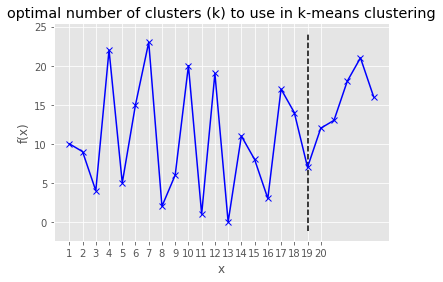

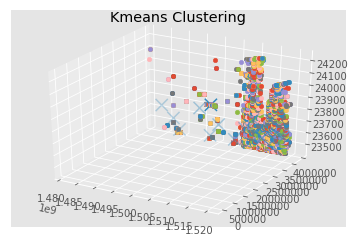

                     FirstNotifiedAt   SiteID  InstanceID  Clusters
Date                                                               
2017-07-12 10:37:02       1499855822  3684492       24134         7
2017-03-18 10:33:13       1489833193  3606427       23473         5
2017-02-16 09:14:11       1487236451  3606357       23911         5
2017-09-19 04:09:56       1505794196  3658175       24092         1
2017-07-21 22:22:45       1500675765  3687379       23634        13
                     FirstNotifiedAt  InstanceID  Clusters
Date                                                      
2017-07-12 10:37:02       1499855822       24134         7
2017-03-18 10:33:13       1489833193       23473         5
2017-02-16 09:14:11       1487236451       23911         5
2017-09-19 04:09:56       1505794196       24092         1
2017-07-21 22:22:45       1500675765       23634        13
19
749
19
19
71
jaccard_distance :  0.6666666666666666 common device :  {23737, 23602}
jaccard_distance :  0.66

jaccard_distance :  0.5189873417721519 common device :  {23553, 23555, 23556, 23559, 23560, 23561, 23562, 23563, 23567, 23572, 23580, 23457, 23458, 23591, 23592, 23593, 23594, 23595, 23596, 23468, 23469, 23602, 23482, 23613, 23614, 23617, 23618, 23747, 23626, 23498, 23890, 23510, 23646, 23648, 23523, 23526, 23531, 23536, 23538, 23546, 23548}
jaccard_distance :  0.5108695652173914 common device :  {23552, 23553, 23554, 23555, 23558, 23563, 23578, 23583, 23458, 23468, 23598, 23602, 23606, 23479, 23482, 23611, 23613, 23614, 23487, 23620, 23497, 23626, 23498, 23509, 23510, 23513, 23642, 23516, 23646, 23523, 23780, 23524, 23654, 23526, 23527, 23528, 23529, 23659, 23531, 23532, 23533, 23663, 23534, 23536, 23538, 23546, 23548}
jaccard_distance :  0.55 common device :  {23552, 23553, 23554, 23555, 23556, 23563, 23569, 23578, 23458, 23592, 23594, 23468, 23469, 23598, 23602, 23606, 23482, 23611, 23613, 23614, 23487, 23497, 23626, 23498, 23631, 23510, 23513, 23642, 23646, 23523, 23654, 23526, 235

jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
23497 is child to 23498


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23563
jaccard score : 0.9090909090909091
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
23497 is child to 23563


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
Device id 2 :  23598
jaccard score : 0.9
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 17}
23497 is parent to 23598


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {1, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23602
jaccard score : 0.75
Common Devices :  {2, 4, 6, 8, 10, 11, 12, 17, 18}
23497 is child to 23602


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 17, 18}
Device id 1 :  23497
Cluster 2 :  {2, 4, 6, 8, 10, 11, 17}
Device id 2 :  23577
jaccard score : 0.7
Co

Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 11, 12, 18}
Device id 2 :  23533
jaccard score : 0.7272727272727273
Common Devices :  {0, 2, 4, 6, 8, 11, 12, 18}
23458 is parent to 23533


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 6, 8, 11, 12, 18}
Device id 2 :  23534
jaccard score : 0.6363636363636364
Common Devices :  {0, 2, 6, 8, 11, 12, 18}
23458 is parent to 23534


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 2 :  23482
jaccard score : 1.0
Common Devices :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
23458 present in same clusters 23482


Cluster 1 :  {0, 2, 4, 6, 8, 10, 11, 12, 14, 17, 18}
Device id 1 :  23458
Cluster 2 :  {0, 2, 6, 8, 10, 11, 12, 18}
Device id 2 :  23611
jaccard score : 0.7272727272727273
Common Devices :  {0, 2, 6, 8, 10, 11, 12, 18}
23458 is parent to 23611


Cluster

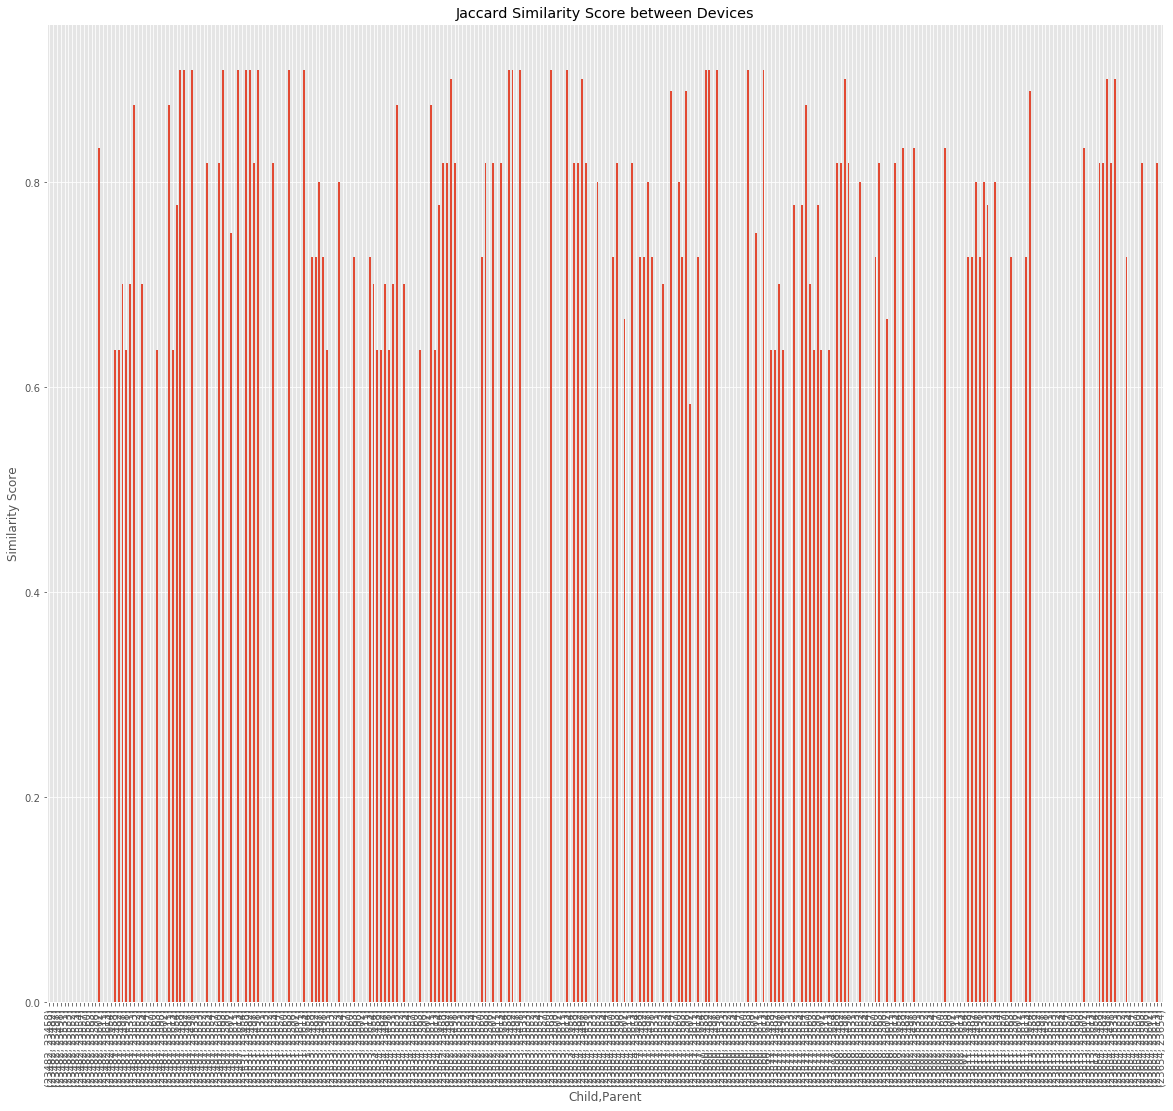

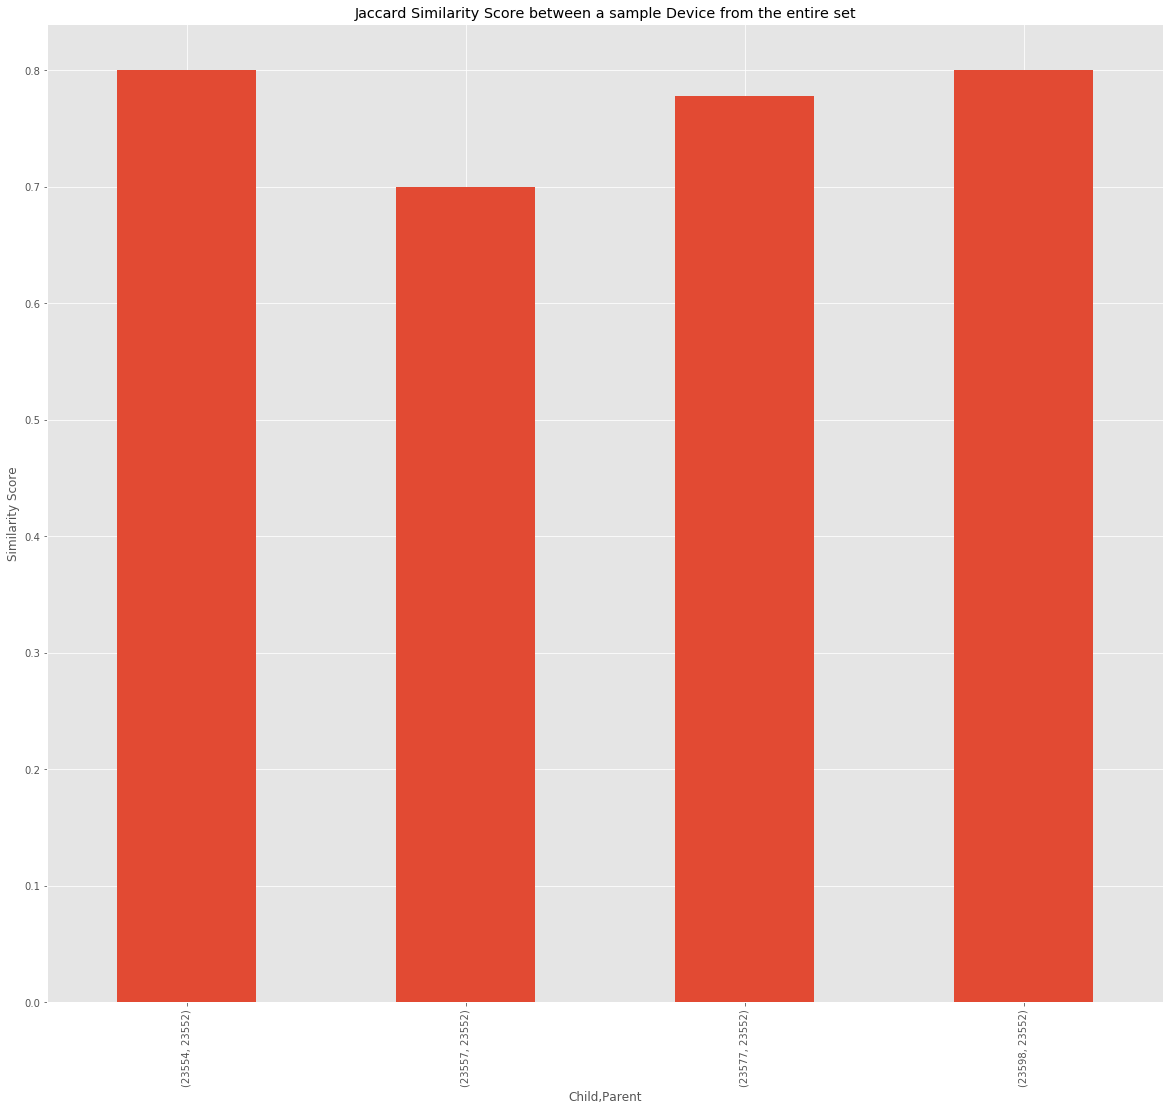

In [70]:
df,X,k = Alarm_Corelation.process_data('Kmeans.csv')
kmeans = Alarm_Corelation.build_model(k)
Alarm_Corelation.train_model(kmeans,X)
Clusters = Alarm_Corelation.predict_clusters(kmeans,X)
Alarm_Corelation.Kmeans_data_visualize(df,X,Clusters,k)
df_cluster = Alarm_Corelation.export_cluster_data(df,Clusters)
Linked_Devices,df_dev = Alarm_Corelation.process_jaccard(df_cluster)
Parent,Child,Jsc = Alarm_Corelation.Parent_Child_Link(Linked_Devices,df_cluster)
Alarm_Corelation.derive_relation(Parent,Child,Jsc)